<a href="https://colab.research.google.com/github/augustocaio95/Data_Warehouse_Lake_BI/blob/main/Data_warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#PARTE 1

#
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos +1),
    'nome': [f'Produto{i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Electrônicos', 'Roupas', 'Alimentos', num_produtos])
}

#
df_produtos = pd.DataFrame(produtos)

#
num_vendas = 1000 #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas), #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000, 10000, num_vendas) #
}

#
df_vendas = pd.DataFrame(data_vendas)

#
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

#
df_vendas = pd.read_csv('vendas.csv')
def_produtos = pd.read_csv('produtos.csv')

#
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

#
df_merge.to_csv('data_warehouse.csv', index=False)

#
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Contéudo do Data Warehouse:")
print(df_warehouse)

Contéudo do Data Warehouse:
           data  produto_id  quantidade  valor_total        nome  categoria
0    2024-04-21         399         197         3303  Produto399  Alimentos
1    2024-04-14         399         148         7121  Produto399  Alimentos
2    2024-04-29         399         190         8855  Produto399  Alimentos
3    2024-04-16         596         141         4615  Produto596  Alimentos
4    2024-04-04         596         111         2158  Produto596  Alimentos
..          ...         ...         ...          ...         ...        ...
995  2024-04-06         258          83         1594  Produto258  Alimentos
996  2024-04-18         249         143         9463  Produto249  Alimentos
997  2024-04-24         236         124         8288  Produto236  Alimentos
998  2024-04-06         457         193         7214  Produto457  Alimentos
999  2024-04-09         336         137         4416  Produto336  Alimentos

[1000 rows x 6 columns]


Análise de vendas por produto:
            quantidade  valor_total
nome                               
Produto1           386        15312
Produto10          248        12631
Produto100         130         4951
Produto101         178         4115
Produto102         104         3783
...                ...          ...
Produto95          625        40902
Produto96          289        10250
Produto97          147         7401
Produto98          212        15944
Produto99          248        10625

[486 rows x 2 columns]

Análise de vendas por taegoria de produto:
           quantidade  valor_total
categoria                         
Alimentos      125362      5465725

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        5360       248392
2024-04-02        5170       223573
2024-04-03        3045       136066
2024-04-04        3519       165771
2024-04-05        4880       215338
2024-04-06        4259       157916
2024-0

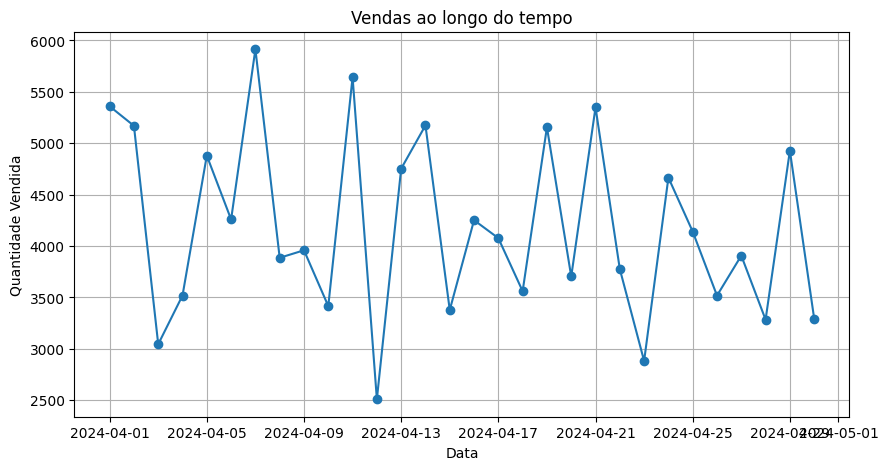


Análise de desempenho de produtos:
nome
Produto1      15312
Produto10     12631
Produto100     4951
Produto101     4115
Produto102     3783
              ...  
Produto95     40902
Produto96     10250
Produto97      7401
Produto98     15944
Produto99     10625
Name: valor_total, Length: 486, dtype: int64


In [ ]:
#PARTE 2
import pandas as pd
import matplotlib.pyplot as plt

#
df_warehouse = pd.read_csv('data_warehouse.csv')

#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

#
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por taegoria de produto:")
print(vendas_por_categoria)

#
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)


plt.figure(figsize=(10,5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

Análise de vendas por produto:
            quantidade  valor_total
nome                               
Produto1           386        15312
Produto10          248        12631
Produto100         130         4951
Produto101         178         4115
Produto102         104         3783
...                ...          ...
Produto95          625        40902
Produto96          289        10250
Produto97          147         7401
Produto98          212        15944
Produto99          248        10625

[486 rows x 2 columns]

Análise de vedas por categoria de produto:
           quantidade  valor_total
categoria                         
Alimentos      125362      5465725

Análise de tedências temporais:
            quantidade  valor_total
data                               
2024-04-01        5360       248392
2024-04-02        5170       223573
2024-04-03        3045       136066
2024-04-04        3519       165771
2024-04-05        4880       215338
2024-04-06        4259       157916
2024-04

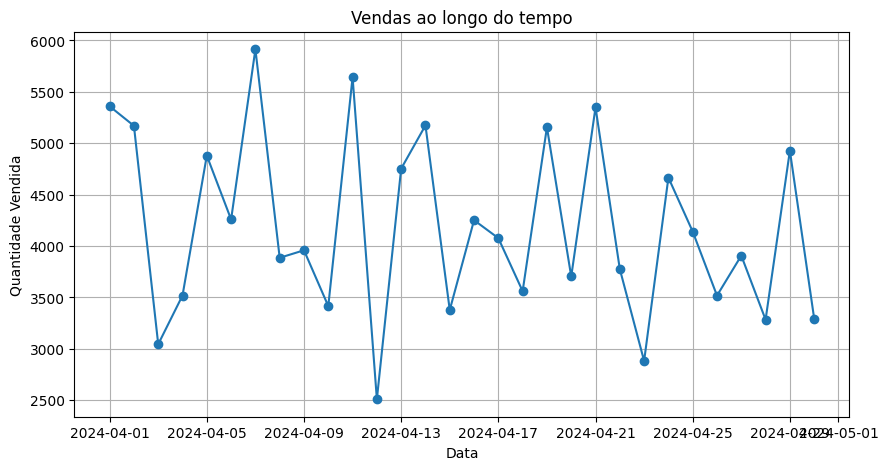


Análise de desempenho de produtos:
nome
Produto1      15312
Produto10     12631
Produto100     4951
Produto101     4115
Produto102     3783
              ...  
Produto95     40902
Produto96     10250
Produto97      7401
Produto98     15944
Produto99     10625
Name: valor_total, Length: 486, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#
df_warehouse = pd.read_csv('data_warehouse.csv')

#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

#
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vedas por categoria de produto:")
print(vendas_por_categoria)

#
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tedências temporais:")
print(vendas_por_data)

#
plt.figure (figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o',linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [ ]:
import pandas as pd
import numpy as np
import os

#
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range (num_files):
    #
    data ={
        'coluna1' : np.random.randint(0, 100, num_rows_per_file),
        'coluna2' : np.random.randn(num_rows_per_file),
        'coluna3' : np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    #
    df = pd.DataFrame(data)

    #
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    #
    dfs.append((file_name, df))

print("Dados do data Lake gerados com sucesso!")

#
for file_name, df in dfs:
    print (f"\nDados do arquivo: {file_name}\n")
    print(df.head())


Dados do data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       99 -0.703844       B
1        4 -2.179591       C
2       55 -1.288071       C
3       34  1.312459       B
4        9  0.086130       A

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0        6  1.043059       A
1       52 -0.090882       C
2       23  0.619860       B
3       41  1.195476       C
4       45 -0.247572       C

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       55  1.207967       A
1       43 -1.011228       A
2       61 -1.472767       A
3       26  1.667006       C
4       17  0.658944       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       48  0.325175       C
1       94  0.177077       A
2       40  0.377082       C
3       41  0.736868       B
4       12 -0.066777       A

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       32 -0.382396     

In [ ]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

#
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range (num_files):
    #
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    #
    df = pd.DataFrame(data)

    #
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index = False)

    #
    dfs.append(df)

print("Dados do data lake gerados com sucesso!")

#
#
conn_string = 'sqlite:///data_lake.db'

#
engine = create_engine(conn_string)

#
for i, df in enumerate (dfs, 1):
    table_name = f'dados_{i}'
    df.to_sql(table_name, engine, index=False)


Dados do data lake gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       75 -0.602771       A
1       70 -0.082629       A
2       76  0.518456       C
3       65 -1.108617       B
4       86  1.211304       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.247000    -0.036673
std      29.545066     1.022011
min       0.000000    -3.771402
25%      24.000000    -0.709318
50%      52.000000    -0.043729
75%      76.000000     0.664109
max      99.000000     3.300497


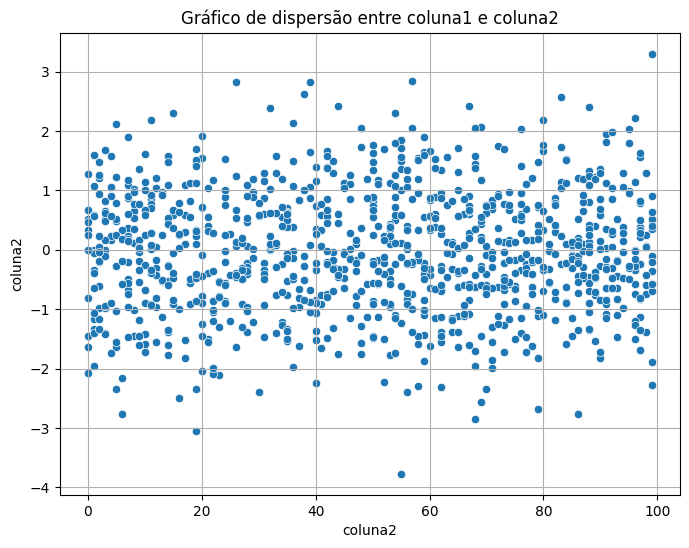

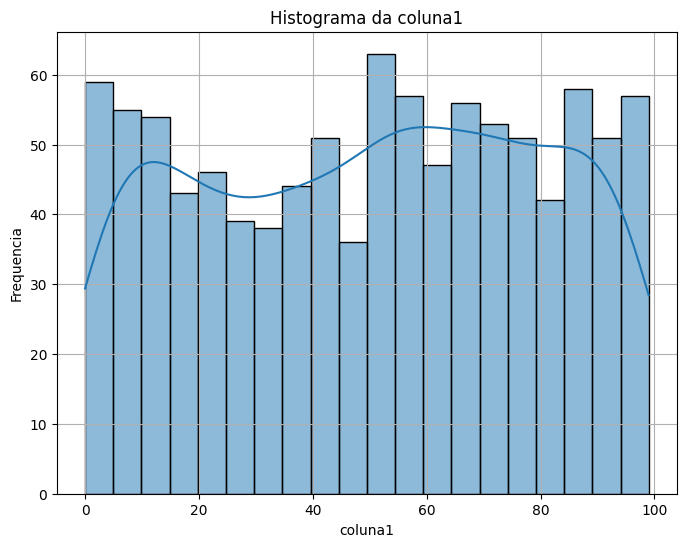

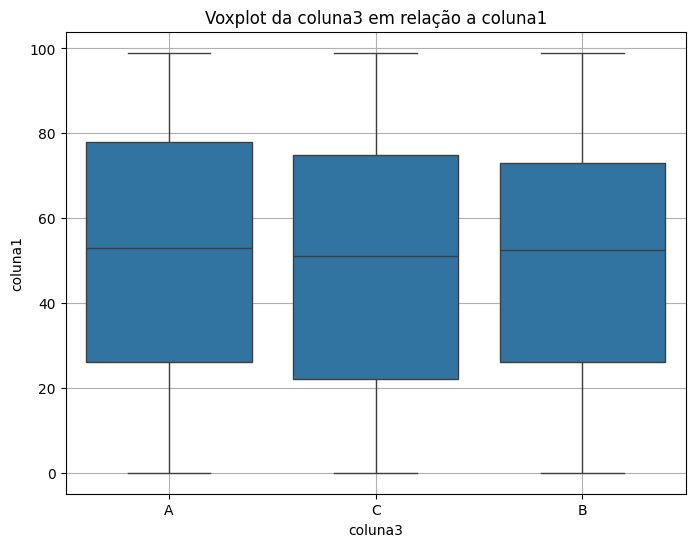

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

#
table_name = 'dados_1' #
df = pd.read_sql_table(table_name, engine)

#
print("Primeiras linhas do DataFrame:")
print(df.head())

#
print("\nInformações sobre o DataFrame:")
print(df.info())

#
print("\nResumo estatístico do DataFrame:")
print(df.describe())

#
#
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.xlabel('coluna2')
plt.grid(True)
plt.show

#
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins = 20, kde = True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show

#
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Voxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()